In [32]:
%pip install --upgrade shapely geopandas

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [33]:
import boto3
import os
from pathlib import Path


def download_files(s3_client, bucket_name: str, local_path: str, file_name: str) -> None:
    local_path = Path(local_path)

    local_path.mkdir(parents=True, exist_ok=True)

    file_path = Path.joinpath(local_path, file_name)
    file_path.parent.mkdir(parents=True, exist_ok=True)
    s3_client.download_file(
        bucket_name,
        file_name,
        str(file_path)
    )


S3_CREDS = {
    "aws_access_key_id": 'YCAJEfM_nw4JeEZgAJlu_YtHq',
    "aws_secret_access_key": 'YCN-CkLzGKTTRC70Xla3uCyDYGUrQGIuDHAulWQ3'
}

bucket = "bucket-datalens-test-abacaba"
file_name = 'raw_overpass/export.geojson'

client = boto3.client(
    service_name='s3',
    endpoint_url='https://storage.yandexcloud.net',
    **S3_CREDS)

download_files(
    client,
    bucket,
    "from-s3-folder",
    file_name
)

In [34]:
import geopandas as pd

In [35]:
df = pd.read_file("from-s3-folder/raw_overpass/export.geojson")

In [36]:
%pip install --upgrade ydata_profiling[notebook]

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.1.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
geopandas 1.1.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompatible.

In [37]:
%pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydata-profiling 4.16.1 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
cupy-cuda11x 11.0.0 requires numpy<1.26,>=1.20, but you have numpy 2.2.6 which is incompatible.
cvxpy 1.3.2 requires setuptools>65.5.1, but you have setuptools 65.5.0 which is incompa

In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df.drop(columns=["geometry"]), title="OSM Profiling Report", explorative=True)
profile

Render HTML: 100%|██████████| 1/1 [00:10<00:00, 10.54s/it]


In [38]:
df.head()

,id,@id,access,access:covid19,activity:dating,addr:city,addr:country,addr:district,addr:door,addr:floor,addr:housenumber,addr:place,addr:postcode,addr:region,addr:street,addr:subdistrict,addr:suburb,addr:unit,air_conditioning,alt_name,alt_name:en,amenity,animal_shelter,architect,architect:en,atm,bakery,bar,barrier,bicycle,billiards,branch,brand,brand:de,brand:en,brand:he,brand:ru,brand:wikidata,brand:wikipedia,breakfast,...,self_service,service:bicycle:pump,service:gaming,shop,short_name,smoking,source,source:addr,sport,start_date,street_vendor,stroller,surveillance,survey:date,takeaway,telegram,theme,toilet,toilets,toilets:access,toilets:disposal,toilets:menstrual_products,toilets:unisex,toilets:wheelchair,tourism,type,url,was:name,was:name:ru,weather_protection,website,website:booking,website:menu,wheelchair,wifi,wikidata,@geometry,wikipedia,wine:type,geometry
0,relation/2029974,relation/2029974,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cafe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,multipolygon,None,None,None,None,None,None,None,None,None,None,center,None,None,POINT (30.47053 59.68904)
1,relation/3310305,relation/3310305,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cafe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,multipolygon,None,None,None,None,None,None,None,None,None,None,center,None,None,POINT (30.32147 59.91625)
2,relation/5417491,relation/5417491,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cafe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,multipolygon,None,None,None,None,None,None,None,None,None,None,center,None,None,POINT (30.37423 59.80659)
3,relation/5814074,relation/5814074,None,None,None,None,None,None,None,None,24А/12,None,198412,None,Александровская улица,None,None,None,None,None,None,cafe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,multipolygon,None,None,None,None,None,None,None,limited,None,None,center,None,None,POINT (29.77025 59.91054)
4,relation/6228004,relation/6228004,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,cafe,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None,None,None,None,NaT,None,None,None,None,None,None,None,None,None,None,None,multipolygon,None,None,None,None,None,None,None,None,None,None,center,None,None,POINT (37.61593 55.75638)


In [39]:
%pip install --upgrade pip
%pip install missingno seaborn matplotlib 


Defaulting to user installation because normal site-packages is not writeable
  Using cached pip-25.1.1-py3-none-any.whl.metadata (3.6 kB)
Using cached pip-25.1.1-py3-none-any.whl (1.8 MB)
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [40]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [56]:
# узнаем, что за колонки у нас есть
# мое внимание привлекли колонки с началом "drink"
df.columns.to_series().to_csv('columns.csv', index=False, header=False)

In [55]:
print(df.shape)
drink_columns = [col for col in df.columns if col.startswith('drink')]
drink_columns
for name in drink_columns:
    null_count = df[name].isna().sum()
    null_percentage = (null_count / len(df)) * 100
    print(name, df[name].unique(), " || amount of none:", null_count, " || percent of not none", 100 - null_percentage)

(8712, 317)
drink [None 'beer']  || amount of none: 8711  || percent of not none 0.01147842056933257
drink:beer [None 'bottled' 'yes' 'served']  || amount of none: 8706  || percent of not none 0.06887052341598121
drink:coffee [None 'served' 'yes' 'retail']  || amount of none: 8610  || percent of not none 1.1707988980716237
drink:cognac [None 'served']  || amount of none: 8711  || percent of not none 0.01147842056933257
drink:espresso [None 'yes']  || amount of none: 8711  || percent of not none 0.01147842056933257
drink:filter_coffee [None 'yes']  || amount of none: 8692  || percent of not none 0.22956841138659456
drink:gin [None 'served']  || amount of none: 8711  || percent of not none 0.01147842056933257
drink:hot_chocolate [None 'served' 'yes']  || amount of none: 8696  || percent of not none 0.1836547291092785
drink:lemonade [None 'yes']  || amount of none: 8711  || percent of not none 0.01147842056933257
drink:milk [None 'served']  || amount of none: 8706  || percent of not none 

In [57]:
df['takeaway'].unique()

array([None, 'yes', 'only', 'no'], dtype=object)

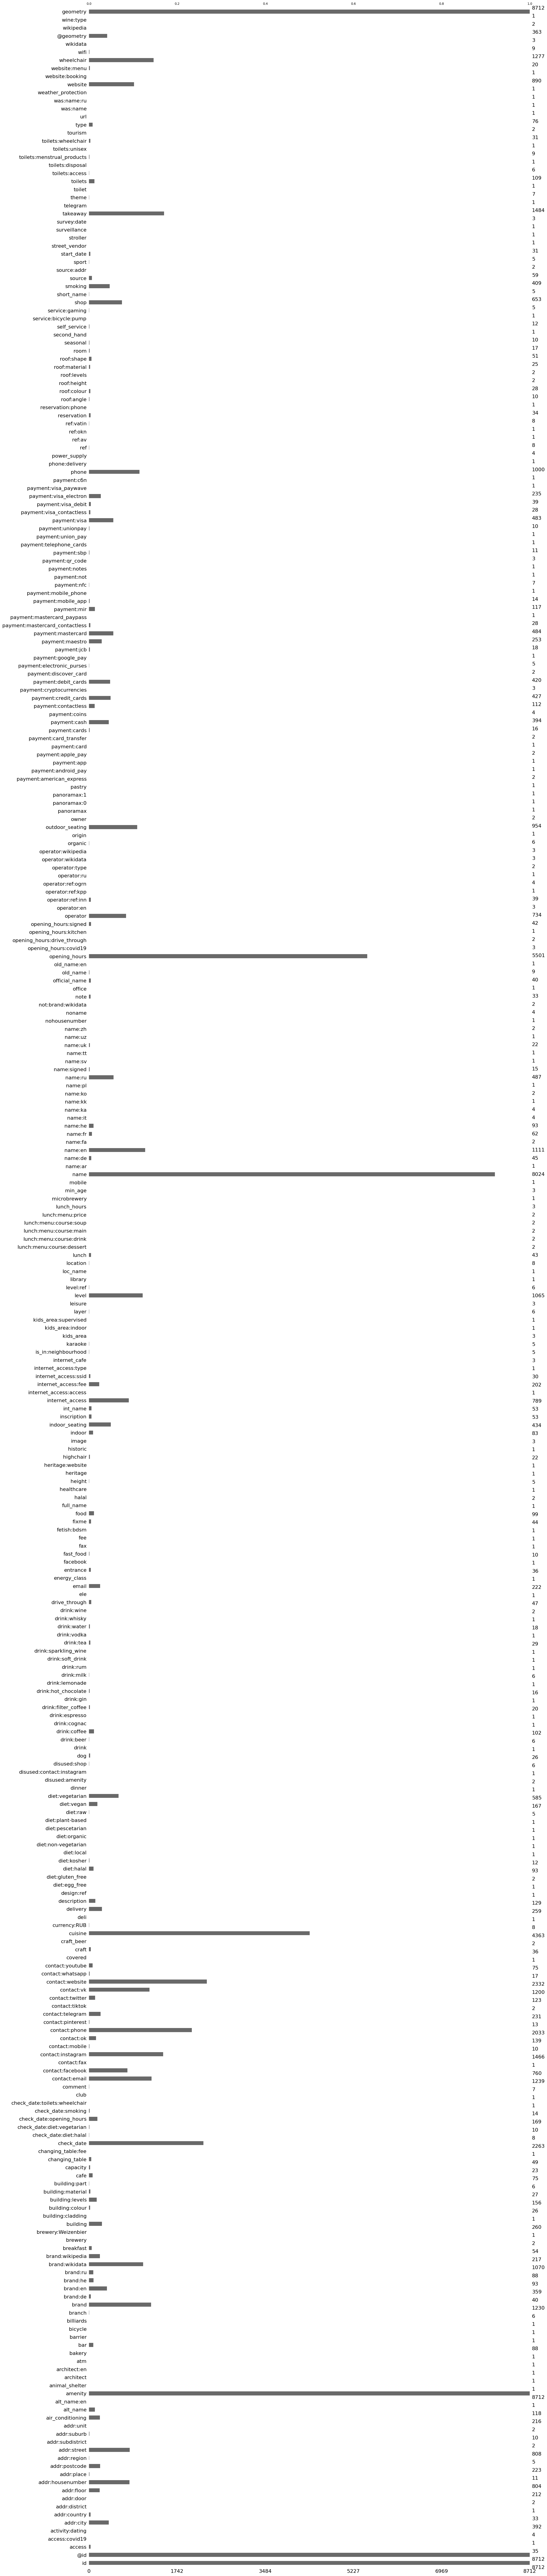

In [24]:
# визуализируем пропуски с помощью графиков из библиотеки missingno
#
msno.bar(df)
plt.show()

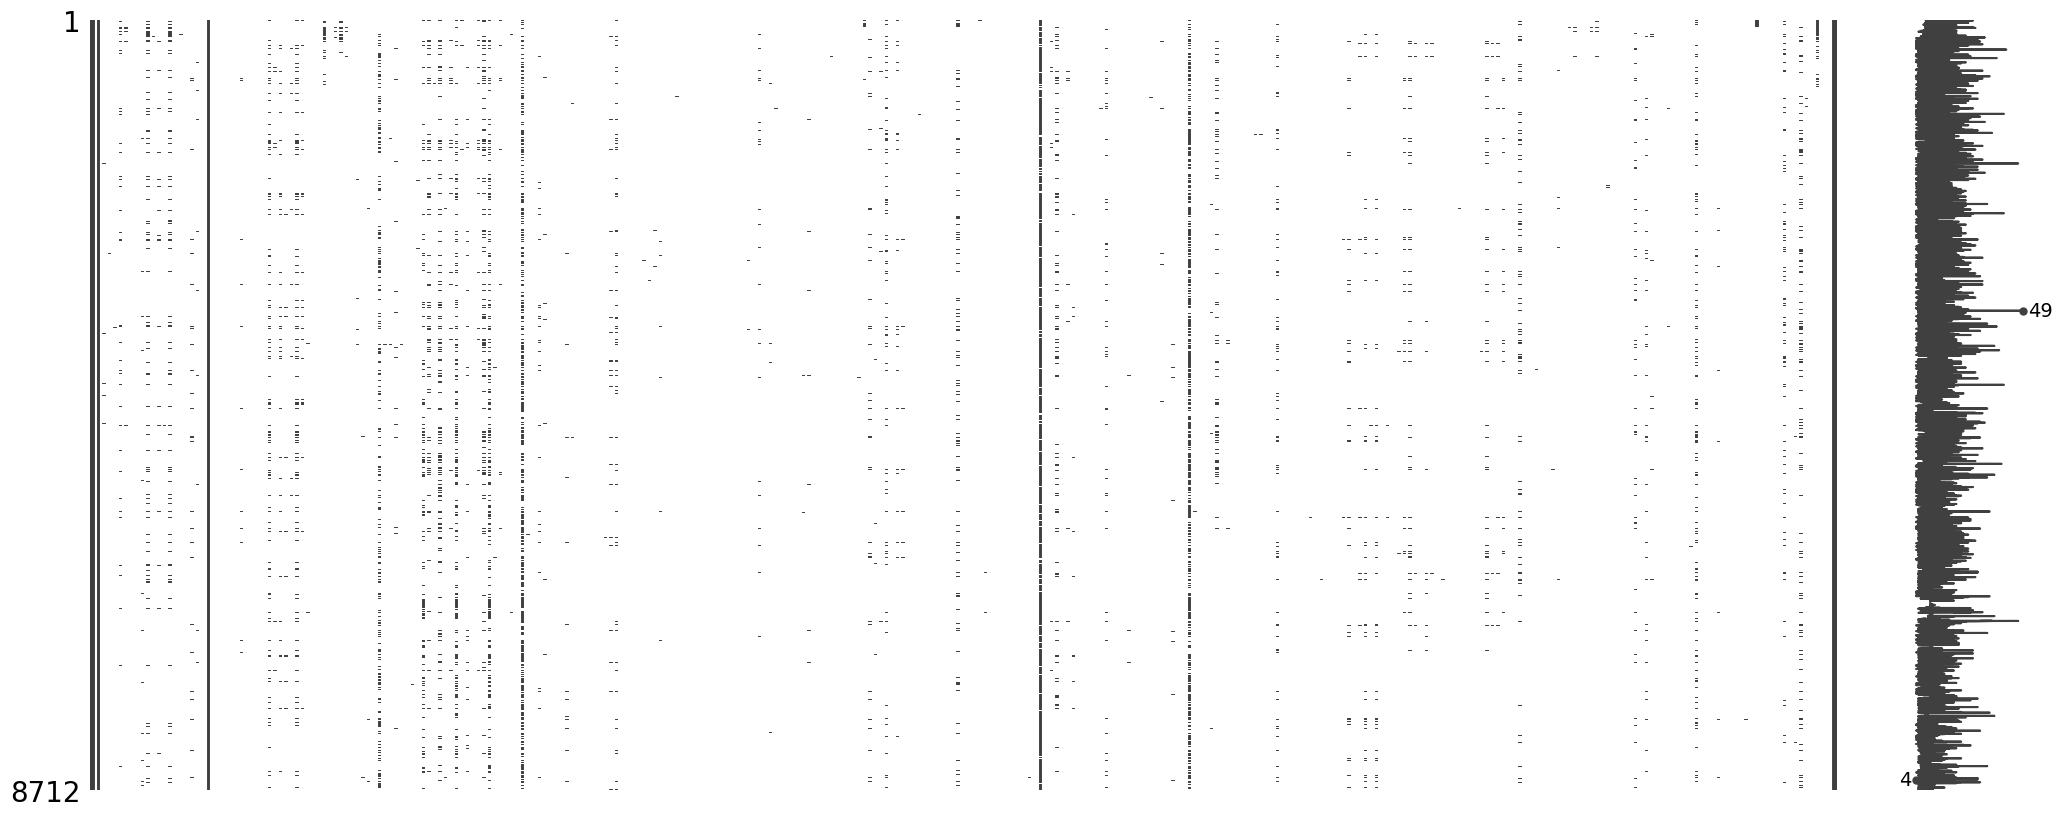

In [25]:
msno.matrix(df)
plt.show()

In [26]:
df.shape

(8712, 317)

In [58]:
df = df.dropna(axis=1, thresh=0.5 * len(df))  # не более 50% пропусков
df = df.loc[:, df.nunique() > 1]
df.shape

(8712, 7)

In [59]:
df

,id,@id,amenity,cuisine,name,opening_hours,geometry
0,relation/2029974,relation/2029974,cafe,None,None,None,POINT (30.47053 59.68904)
1,relation/3310305,relation/3310305,cafe,None,None,None,POINT (30.32147 59.91625)
2,relation/5417491,relation/5417491,cafe,None,None,24/7,POINT (30.37423 59.80659)
3,relation/5814074,relation/5814074,cafe,None,Герберг,"Mo-Fr 11:00-23:00; Sa,Su 12:00-23:00+",POINT (29.77025 59.91054)
4,relation/6228004,relation/6228004,cafe,None,Манежка.Ru,None,POINT (37.61593 55.75638)
...,...,...,...,...,...,...,...
8707,node/12956491656,node/12956491656,internet_cafe,None,Colizeum,None,POINT (37.67419 55.7412)
8708,node/12957125816,node/12957125816,cafe,coffee_shop;pie,Цех85,Mo-Fr 08:00-22:00; Sa-Su 09:00-22:00,POINT (30.4357 59.88148)
8709,node/12960817101,node/12960817101,cafe,cake;coffee_shop,One and Double,None,POINT (37.54503 55.8647)
8710,node/12964188347,node/12964188347,cafe,coffee_shop,Самое Время,None,POINT (30.3994 60.01237)


In [60]:
valid_columns = [col for col in df.columns]
for name in valid_columns:
    null_count = df[name].isna().sum()
    null_percentage = (null_count / len(df)) * 100
    print(name, df[name].unique(), " || amount of none:", null_count, " || percent of not none", 100 - null_percentage)

id ['relation/2029974' 'relation/3310305' 'relation/5417491' ...
 'node/12960817101' 'node/12964188347' 'node/12976303101']  || amount of none: 0  || percent of not none 100.0
@id ['relation/2029974' 'relation/3310305' 'relation/5417491' ...
 'node/12960817101' 'node/12964188347' 'node/12976303101']  || amount of none: 0  || percent of not none 100.0
amenity ['cafe' 'internet_cafe' 'cafeteria' 'hookah_lounge;cafe']  || amount of none: 0  || percent of not none 100.0
cuisine [None 'coffee_shop' 'asian' 'ice_cream' 'kebab' 'georgian' 'pizza' 'beef'
 'international' 'empanada;russian' 'uzbek' 'regional;pizza' 'regional'
 'oriental;georgian' 'barbecue' 'lunch' 'local' 'russian'
 'falafel;smoothie;salad;coffee_shop;diet;healthy' 'vietnamese' 'donut'
 'grill;burger' 'burger' 'caucasian' 'breakfast;cake;coffee_shop' 'pie'
 'chinese' 'grill;steak_house;american;regional' 'seafood;russian;local'
 'coffee_shop;dessert;sandwich' 'cake;coffee_shop' 'italian'
 'barbecue;burger' 'cake' 'regional;bee